# Libraries

In [1]:
import re
import os
import glob
from pprint import pprint
import pandas as pd
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab
import openbabel as obabel
import pybel as babel

In [2]:
%matplotlib inline
%matplotlib notebook
# Matplotlib options
%matplotlib inline
mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

# Working with AutodockVina output (pdbqt) files

In [6]:
os.chdir ('/Users/angel/Dropbox/Doctorado/Experimentos/zincinman_CD44_PYRX/Macromolecules/CD44_chimera/')
files=[]
names =[]
scores=[]
mass=[]
formula=[]
smiles=[]
model=[]
for file in glob.glob("*.pdbqt"):
    with open(file,'rt') as pdbqt_file:
        for line in pdbqt_file:
            line = line.strip()
            if "VINA RESULT" in line:
                neg = re.search(r'-\d.\d', line)
                neg_2= re.search (r'-\d\d.\d',line)
                if neg:
                    files.append (pdbqt_file.name)
                    scores.append (float(neg.group()))
                
                elif neg_2:
                    files.append (pdbqt_file.name)
                    scores.append (float(neg_2.group()))
                
                if not (neg or neg_2):
                    files.append (pdbqt_file.name) 
                    scores.append ('positive value, sorry I can´t keep it (yet)')
                    
    for mol in babel.readfile("pdbqt",file):
        names.append (mol.title)
        mass.append (mol.molwt)
        formula.append (mol.formula)
        model.append (mol.data['MODEL'])
        smiles.append (mol)
        
d={ 'file':pd.Series(files),
    'score':pd.Series(scores),
    'model':pd.Series (model),
    'compound name':pd.Series(names),
    'molecular formula': pd.Series (formula),
    'molecular weight': pd.Series (mass),
    'smiles':pd.Series (smiles)}
table=pd.DataFrame (d)

In [17]:
print ('number of ligands:',(len (files)/9))
print ('number of total conformations:', len (files))
table

number of ligands: 1643.0
number of total conformations: 14787


,file,score,model,compound name,molecular formula,molecular weight,smiles
0,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.5,1,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
1,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.5,2,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
2,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.2,3,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
3,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.1,4,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
4,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.0,5,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
5,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.0,6,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
6,ZINC38144597_mmff94_E=119.82_out.pdbqt,-4.9,7,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
7,ZINC38144597_mmff94_E=119.82_out.pdbqt,-4.9,8,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
8,ZINC38144597_mmff94_E=119.82_out.pdbqt,-4.9,9,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
9,ZINC01530974_mmff94_E=104.63_out.pdbqt,-5.4,1,ZINC01530974_mmff94_E=104.63_out.pdbqt,C19H18Cl3N2S,412.78362,[C@@H](Sc1c(cccc1Cl)Cl)(CCc1ccc(cc1)Cl)CN1CNC=...


## Save the table to a csv file

In [8]:
table.to_csv ('no_sorted_scores.csv')
sort=table.sort_values ('score',ascending=False)
sort.to_csv ('sorted_scores.csv')

## Ploting options

Text(0,0.5,'score (Kcal/mol)')

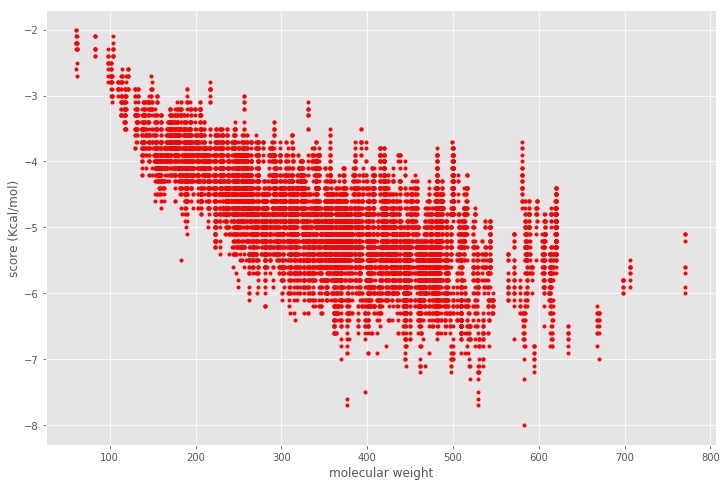

In [9]:

plt.plot (list(table['molecular weight']),list(table['score']),'ro', marker='.')
plt.xlabel('molecular weight')
plt.ylabel ('score (Kcal/mol)')

Text(0,0.5,'score (Kcal/mol)')

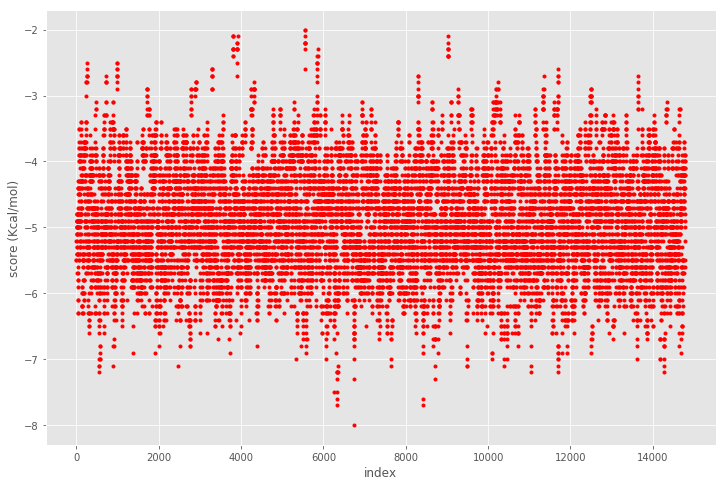

In [10]:
plt.plot ((list(sort.index)),list(sort['score']), 'ro',marker='.')
plt.xlabel('index')
plt.ylabel ('score (Kcal/mol)')

# Working with GOLD output (mol2) files

In [ ]:
## NOT implemented yet

file ='/home/angel/Desktop/gold_soln_l1886_3D_H_Ch_m1_2.mol2'
with open(file,'rt') as file:
    for line in file:
            line = line.strip()
            if 'Gold.Score' in line:
                x=line.strip()
                print (x)

## Extracting just the data from MODEL 1

In [27]:
os.chdir ('/Users/angel/Dropbox/Doctorado/Experimentos/zincinman_CD44_PYRX/Macromolecules/CD44_chimera/')
files=[]
names =[]
scores=[]
mass=[]
formula=[]
smiles=[]
model=[]
for file in glob.glob("*.pdbqt"):
    with open(file,'rt') as pdbqt_file:
        line = line.strip()
        Nlines=pdbqt_file.readlines()[0:2]
        line = Nlines[1]
        if "VINA RESULT" in line:
            neg = re.search(r'-\d.\d', line)
            neg_2= re.search (r'-\d\d.\d',line)
            if neg:
                files.append (pdbqt_file.name)
                scores.append (float(neg.group()))

            elif neg_2:
                files.append (pdbqt_file.name)
                scores.append (float(neg_2.group()))

            if not (neg or neg_2):
                files.append (pdbqt_file.name) 
                scores.append ('positive value, sorry I can´t keep it (yet)')
                    
    for mol in babel.readfile("pdbqt",file):
        names.append (mol.title)
        mass.append (mol.molwt)
        formula.append (mol.formula)
        model.append (mol.data['MODEL'])
        smiles.append (mol)
        
d={ 'file':pd.Series(files),
    'score':pd.Series(scores),
    'model':pd.Series (model),
    'compound name':pd.Series(names),
    'molecular formula': pd.Series (formula),
    'molecular weight': pd.Series (mass),
    'smiles':pd.Series (smiles)}
table=pd.DataFrame (d)

In [28]:
table

,file,score,model,compound name,molecular formula,molecular weight,smiles
0,ZINC38144597_mmff94_E=119.82_out.pdbqt,-5.5,1,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
1,ZINC01530974_mmff94_E=104.63_out.pdbqt,-5.4,2,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
2,ZINC22033872_mmff94_E=175.85_out.pdbqt,-5.7,3,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
3,ZINC02545165_mmff94_E=136.79_out.pdbqt,-4.8,4,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
4,ZINC00001402_mmff94_E=57.04_out.pdbqt,-5.8,5,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
5,ZINC38337186_mmff94_E=168.05_out.pdbqt,-6.3,6,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
6,ZINC00000757_mmff94_E=33.43_out.pdbqt,-4.0,7,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
7,ZINC04096694_mmff94_E=-48.32_out.pdbqt,-5.1,8,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
8,ZINC38139392_mmff94_E=461.11_out.pdbqt,-5.0,9,ZINC38144597_mmff94_E=119.82_out.pdbqt,C24H31N3O,377.52244,c1(c(c(=O)n(n1C)c1ccccc1)C(C)C)CN(C)[C@H](C)Cc...
9,ZINC04676424_mmff94_E=82.15_out.pdbqt,-5.4,1,ZINC01530974_mmff94_E=104.63_out.pdbqt,C19H18Cl3N2S,412.78362,[C@@H](Sc1c(cccc1Cl)Cl)(CCc1ccc(cc1)Cl)CN1CNC=...


'REMARK VINA RESULT:      -4.4      0.000      0.000\n'